<h1 id="aa" align="center" style="color:white;background:#8B0000;padding:18px;border-radius:15px 50px; font-family:newtimeroman;"> Итоговая работа </h1>

## Введение
В данном отчете представлен анализ датасета новостных статей, содержащего 50,000 записей. Основная цель работы - предварительная обработка текстовых данных и их визуализация для дальнейшего анализа.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Загружаем библиотеки необходимые для работы с DataFrame и графиками

In [5]:
df = pd.read_csv("lenta-ru-news_1.csv", encoding='utf-8', on_bad_lines="skip")

In [6]:
df

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
49995,https://lenta.ru/news/2002/05/21/polls/,Американцы не верят своему правительству,Газета The Washington Post и телерадиовещатель...,Мир,Все,2002/05/21
49996,https://lenta.ru/news/2002/05/22/arrest/,Задержаны подозреваемые в нападении на охрану ...,В Чечне задержаны четверо подозреваемых в напа...,Россия,Все,2002/05/22
49997,https://lenta.ru/news/2002/05/22/petuhov/,Главу страховой компании СОГАЗ убили выстрелом...,В ночь на вторник на подмосковной даче неизвес...,Россия,Все,2002/05/22
49998,https://lenta.ru/news/2002/05/22/threat/,Великобритания готовится к ядерной войне Индии...,Великобритания распространила предупреждение о...,Мир,Все,2002/05/22


url – ссылка на новость

title – заголовк

text – основной ткст

topic – общая тема (возможно, главная катеория)

tags – дополнительные метки (может быть полезно для уточнения каегорий)

date – дата публикации

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     50000 non-null  object
 1   title   50000 non-null  object
 2   text    50000 non-null  object
 3   topic   50000 non-null  object
 4   tags    49999 non-null  object
 5   date    50000 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


Просмотрев информацию, видно что в файле 50 000 записей, без пропущенных значений

Было проанализировано распределение новостей по темам:

In [11]:
print("Распределение по topic:")
print(df['topic'].value_counts())

Распределение по topic:
topic
Россия               20129
Мир                  12104
Экономика             5771
Интернет и СМИ        4003
Культура              3551
Спорт                 2753
Из жизни              1683
Библиотека               5
Силовые структуры        1
Name: count, dtype: int64


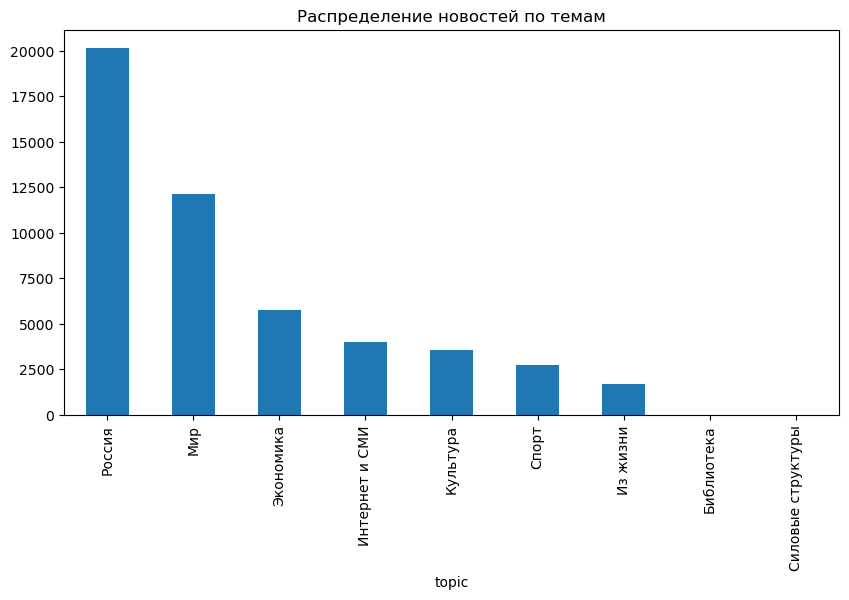

In [12]:
df['topic'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Распределение новостей по темам")
plt.show()

Смотрим на графике распределение новостей

### Предобработка текста

In [14]:
import re
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

В данном блоке кода импортируются необходимые библиотеки для выполнения задач обработки естественного языка (NLP)

In [16]:
morph = MorphAnalyzer()
stop_words = stopwords.words('russian') + ["ещё"]

Здесь выполняется настройка окружения для работы с текстом

In [18]:
def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else " " for ch in text])

def remove_spaces(text):
    return re.sub(r'\s+', " ", text)

def remove_numbers(text):
    return "".join([i if not i.isdigit() else " " for i in text])

def lematazing(text):
    return [morph.parse(word)[0].normal_form for word in text]
    

def tokenize(text):
    tokens = word_tokenize(text)
    return [token for token in tokens if token]

def remove_stopwords(tokens, stopwords):
    removed = []
    for token in tokens:
        if token.lower() not in stopwords:
            removed.append(token)
    return removed

Здесь определены функции для поэтапной очистки и нормализации текста с токенизацией

In [20]:
df.text = df.text.apply(lambda x: remove_punctuation(x.lower()))

In [21]:
df.text = df.text.apply(lambda x: remove_spaces(x.lower()))

In [22]:
df.text = df.text.apply(lambda x: remove_numbers(x.lower()))

In [23]:
df.text = df.text.apply(lambda x: tokenize(x))

In [24]:
df.text = df.text.apply(lambda x: lematazing(x))

In [25]:
df.text = df.text.apply(lambda x: remove_stopwords(x, stop_words))

In [26]:
df

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,"[бой, сопоцкина, друскеник, закончиться, отсту...",Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"[министерство, народный, просвещение, вид, про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"[штабс, капитан, п, н, нестеров, день, увидеть...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,"[фотограф, корреспондент, daily, mirror, расск...",Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"[лицо, приехать, варшава, люблин, передавать, ...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
49995,https://lenta.ru/news/2002/05/21/polls/,Американцы не верят своему правительству,"[газета, the, washington, post, телерадиовещат...",Мир,Все,2002/05/21
49996,https://lenta.ru/news/2002/05/22/arrest/,Задержаны подозреваемые в нападении на охрану ...,"[чечня, задержать, четверо, подозревать, напад...",Россия,Все,2002/05/22
49997,https://lenta.ru/news/2002/05/22/petuhov/,Главу страховой компании СОГАЗ убили выстрелом...,"[ночь, вторник, подмосковный, дача, неизвестны...",Россия,Все,2002/05/22
49998,https://lenta.ru/news/2002/05/22/threat/,Великобритания готовится к ядерной войне Индии...,"[великобритания, распространить, предупреждени...",Мир,Все,2002/05/22


In [27]:
from wordcloud import WordCloud

Импортируется модуль для создания наглядного представления текстовой информации

In [29]:
text = " ".join(df.text.astype(str).tolist()) 

Данная строка кода выполняет объединение текстовых данных из DataFrame в одну строку

In [31]:
word_cld = WordCloud(width=800, height=600, background_color='white').generate(text)

Здесь создается и настраивается объект облака слов на основе объединенного текста

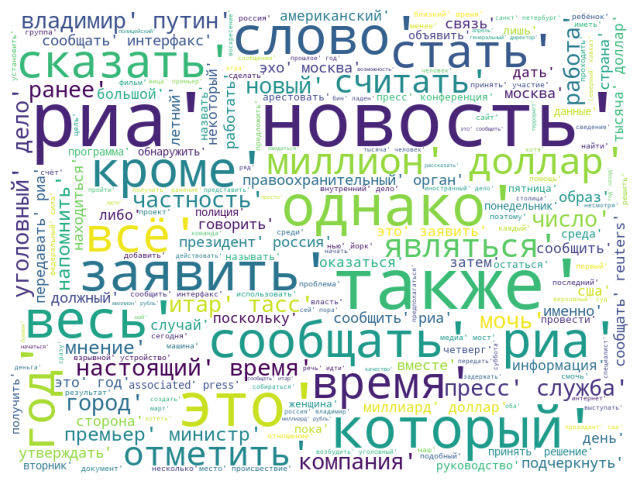

In [33]:
plt.figure(figsize=(8, 8))
plt.imshow(word_cld)
plt.axis('off')
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Здесь импортируются инструменты для преобразования текста в числовой формат

### Векторизация

In [36]:
vector = CountVectorizer()
count_matrix = vector.fit_transform(df.text.apply(lambda x: "".join(word + " " for word in x)))

В этом блоке кода происходит векторизация текстовых данных с использованием CountVectorizer

In [38]:
matrix = count_matrix

Здесь переменной присваивается ссылка на другую переменную

In [40]:
from sklearn.cluster import KMeans

Импортируется алгоритм кластеризации из библиотеки scikit-learn

In [42]:
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,3), max_features=10)
tfidf_matrix = tfidf.fit_transform(df.text.apply(lambda x: "".join(word + " " for word in x)))
tfidf_matrix.shape

(50000, 10)

В данном блоке кода выполняется векторизация текста с использованием TF-IDF и ограничивается размер словаря

### Кластеризация

In [44]:
wgss = []

for i in range(1, 18):
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=18)
    kmean.fit(tfidf_matrix)
    wgss.append(kmean.inertia_)

Данный блок кода выполняет поиск оптимального количества кластеров для алгоритма KMeans с использованием метода локтя (Elbow Method)

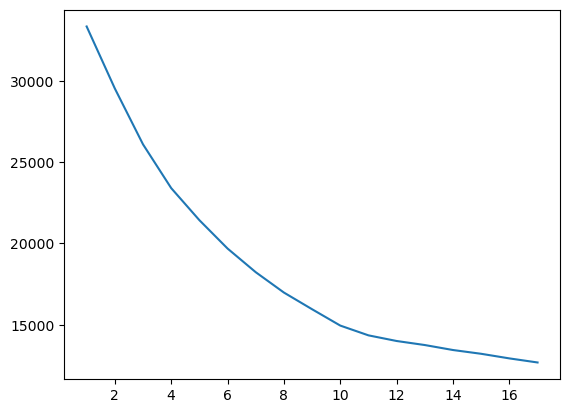

In [46]:
plt.plot(range(1, 18), wgss);
plt.show()

In [47]:
n_clusters = 11

Здесь задается выбранное количество кластеров

In [49]:
kmeans = KMeans(n_clusters=n_clusters, n_init=18, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

В этом блоке кода выполняется кластеризация текста с использованием алгоритма KMeans

In [51]:
df["cluster"] = clusters

Здесь результаты кластеризации добавляются в DataFrame

In [53]:
df["cluster"].value_counts()

cluster
1     7306
3     7177
0     6437
8     5097
7     5024
9     4484
5     4417
2     3819
10    3612
4     1462
6     1165
Name: count, dtype: int64

В данном коде подсчитывается количество элементов в каждом кластере

In [55]:
from collections import Counter

Импортируется класс для подсчета количества элементов

In [57]:
def get_top_words(cluster_texts, n=10, exclude_words=None):
    if exclude_words is None:
        exclude_words = ["", " ", "—", "–", "-", "\n", "\t"]
    
    all_words = [
        word.strip().lower()
        for word_list in cluster_texts
        for word in word_list
        if word.strip() and word not in exclude_words
    ]
    
    return Counter(all_words).most_common(n)

def print_cluster_top_words(df, n=10):
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_texts = df[df['cluster'] == cluster_id]['text']
        top_words = get_top_words(cluster_texts, n=n)
        
        print(f"Cluster {cluster_id}:")
        for word, count in top_words:
            print(f"  {word}: {count}")
        print()

print_cluster_top_words(df)

Cluster 0:
  человек: 11702
  который: 4197
  сообщать: 3968
  это: 3383
  погибнуть: 2707
  находиться: 2357
  год: 2354
  время: 2332
  результат: 2308
  сообщить: 2300

Cluster 1:
  год: 22458
  это: 6040
  который: 5855
  сообщать: 4061
  суд: 3284
  доллар: 3274
  процент: 3107
  свой: 2829
  компания: 2709
  миллион: 2557

Cluster 2:
  время: 6369
  который: 2311
  сообщать: 2219
  это: 2178
  сообщить: 1358
  год: 1356
  свой: 1250
  настоящий: 1147
  новость: 1140
  находиться: 1063

Cluster 3:
  россия: 17563
  это: 6049
  российский: 5769
  который: 4793
  президент: 4731
  год: 4541
  новость: 3318
  сообщать: 3169
  риа: 3152
  сообщить: 3149

Cluster 4:
  сообщать: 1773
  новость: 400
  израильский: 391
  риа: 375
  москва: 367
  город: 330
  место: 309
  район: 305
  палестинский: 290
  результат: 274

Cluster 5:
  свой: 9746
  который: 3874
  это: 3345
  год: 2632
  сообщать: 2566
  компания: 1750
  весь: 1557
  сша: 1507
  президент: 1501
  первый: 1478

Cluster 6:
  со

Этот код определяет функции для анализа наиболее часто встречающихся слов в каждом кластере и выводит их на экран

In [59]:
cluster_names = {
    0: "Официальные заявления и политика",
    1: "Финансы и бизнес-аналитика",
    2: "Текущие события и оперативные новости",
    3: "Ближневосточные конфликты",
    4: "Военные сводки и спецоперации",
    5: "Корпоративные новости и экономика",
    6: "Происшествия и кризисные ситуации", 
    7: "Российская внутренняя политика",
    8: "Деловые и политические сводки",
    9: "Международные отношения и геополитика",
    10: "Публичные выступления и заявления"
}

df['cluster_name'] = df['cluster'].map(cluster_names)

print(df[['cluster', 'cluster_name']].drop_duplicates().sort_values('cluster'))

     cluster                           cluster_name
6          0       Официальные заявления и политика
0          1             Финансы и бизнес-аналитика
21         2  Текущие события и оперативные новости
5          3              Ближневосточные конфликты
100        4          Военные сводки и спецоперации
3          5      Корпоративные новости и экономика
79         6      Происшествия и кризисные ситуации
8          7         Российская внутренняя политика
4          8          Деловые и политические сводки
17         9  Международные отношения и геополитика
15        10      Публичные выступления и заявления


Этот код назначает имена кластерам и выводит соответствие между номером кластера и его именем

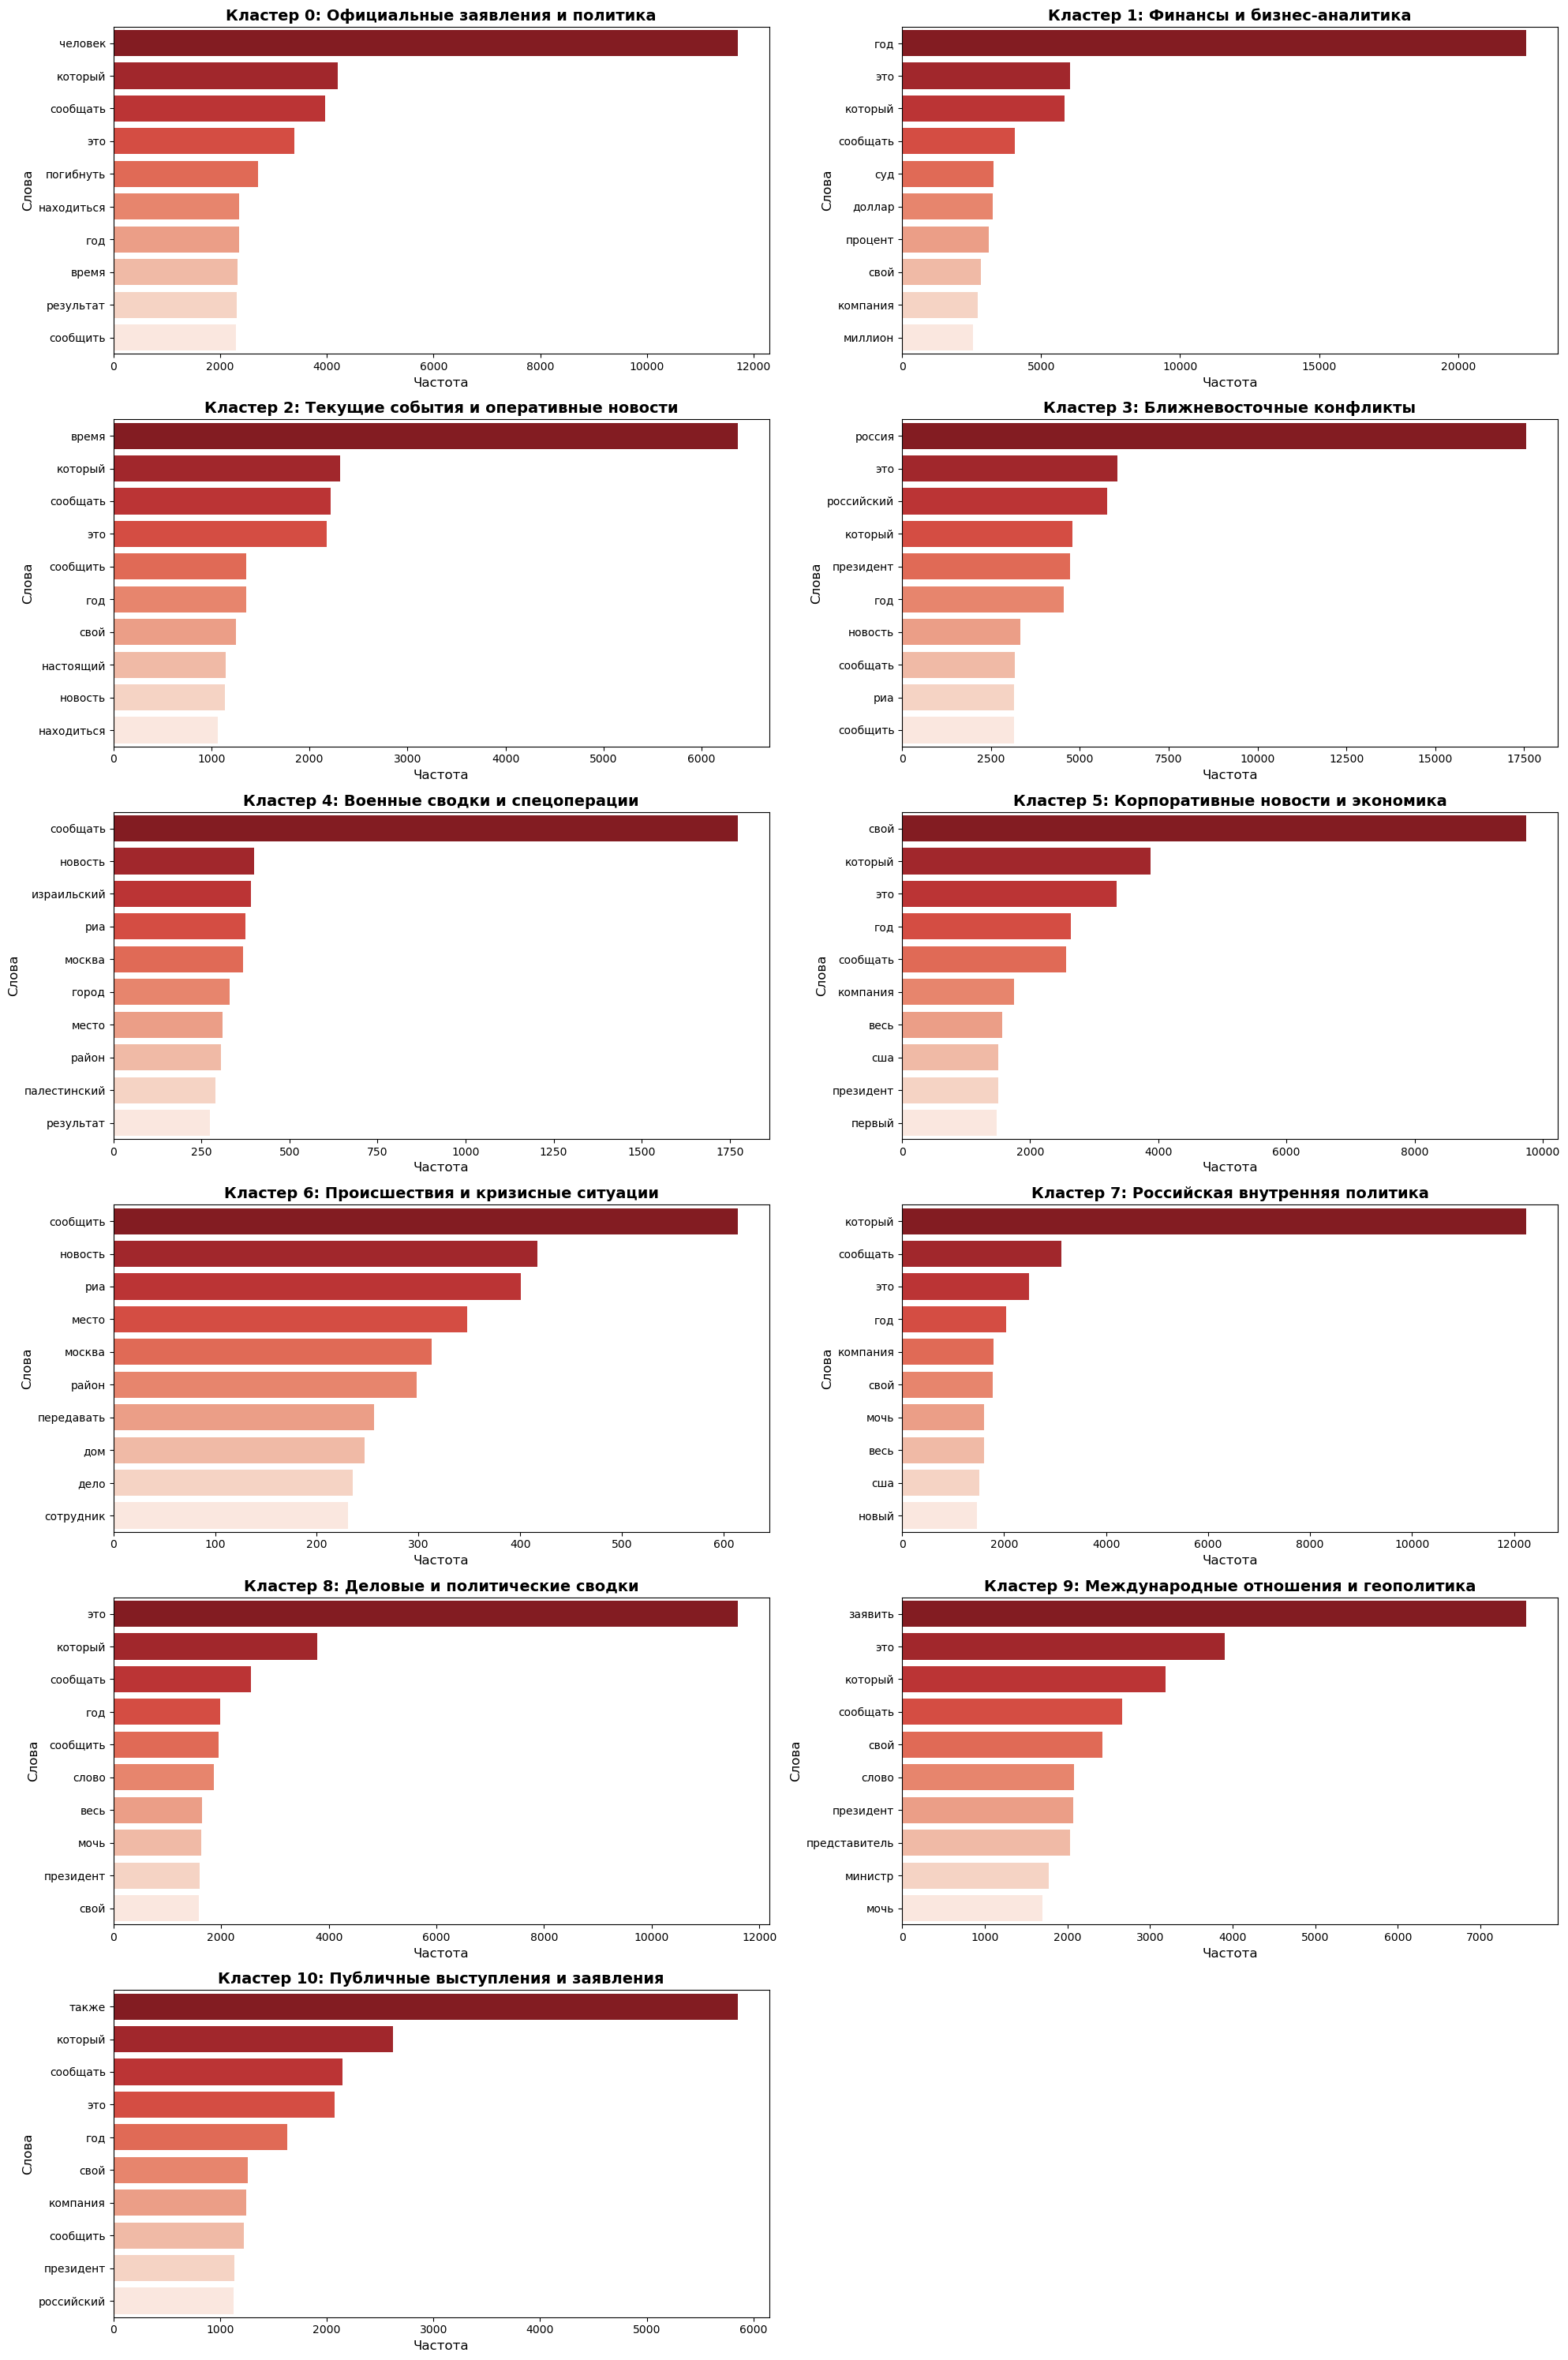

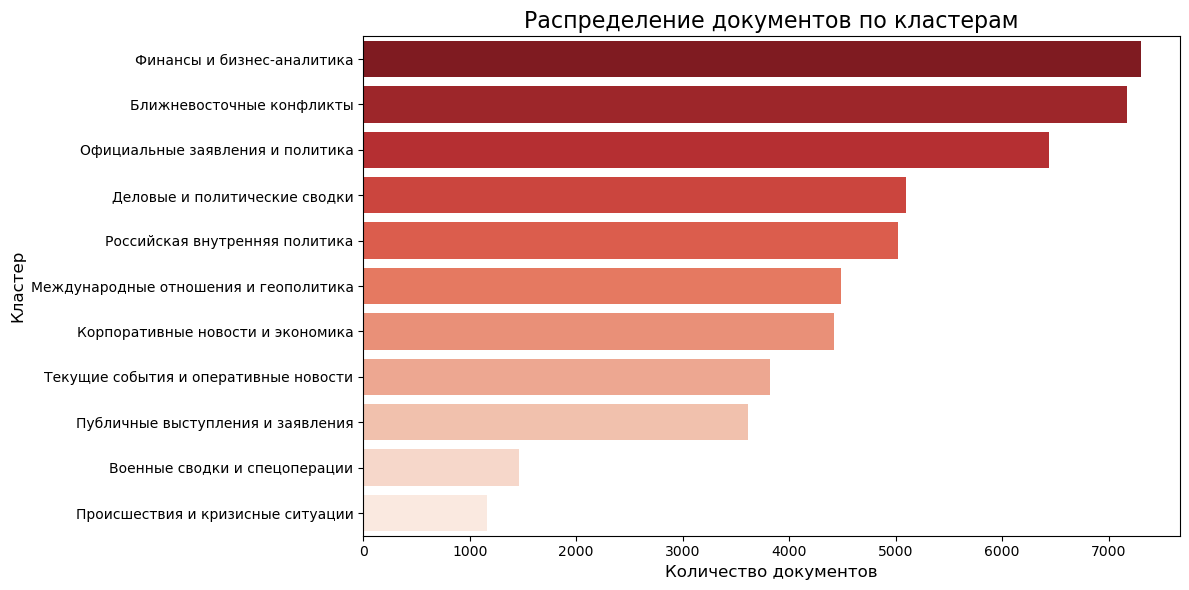

In [61]:
def clean_word(word):
    """Функция для очистки и проверки слов"""
    word = str(word).strip()
    return word if (word and 
                   not word.isspace() and 
                   word not in ["—", "–", "-", "''", '""', " ", "\n", "\t"]) else None

top_words = []
for cluster_id in sorted(df['cluster'].unique()):
    cluster_texts = df[df['cluster'] == cluster_id]['text']
    
    words = [clean_word(word) 
             for sublist in cluster_texts 
             for word in sublist]
    
    words = [word for word in words if word is not None]
    
    word_counts = Counter(words).most_common(10)
    
    for word, count in word_counts:
        top_words.append({
            'cluster': cluster_id,
            'cluster_name': cluster_names[cluster_id],
            'word': word,
            'count': count
        })

top_words_df = pd.DataFrame(top_words)

n_clusters = len(df['cluster'].unique())
n_cols = 2
n_rows = (n_clusters + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
plt.subplots_adjust(hspace=0.5)

for i, cluster_id in enumerate(sorted(df['cluster'].unique())):
    ax = axes[i // n_cols, i % n_cols]
    cluster_data = top_words_df[top_words_df['cluster'] == cluster_id]
    
    if not cluster_data.empty:
        sns.barplot(
            data=cluster_data,
            x='count',
            y='word',
            hue='word',
            palette='Reds_r',
            legend=False,
            ax=ax
        )
        
        ax.set_title(f'Кластер {cluster_id}: {cluster_names[cluster_id]}', 
                     fontweight='bold', 
                     fontsize=14)
        ax.set_xlabel('Частота', fontsize=12)
        ax.set_ylabel('Слова', fontsize=12)
        ax.tick_params(axis='y', labelsize=10)

if n_clusters % n_cols != 0:
    for j in range(n_clusters % n_cols, n_cols):
        fig.delaxes(axes[n_rows-1, j])

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
cluster_sizes = df['cluster_name'].value_counts()

sns.barplot(
    x=cluster_sizes.values,
    y=cluster_sizes.index,
    hue=cluster_sizes.index,
    palette='Reds_r',
    legend=False,
    order=cluster_sizes.index
)

plt.title('Распределение документов по кластерам', fontsize=16)
plt.xlabel('Количество документов', fontsize=12)
plt.ylabel('Кластер', fontsize=12)
plt.tight_layout()
plt.show()

Этот код генерирует визуализации, показывающие наиболее часто встречающиеся слова в каждом кластере и размеры кластеров

In [63]:
df

,url,title,text,topic,tags,date,cluster,cluster_name
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,"[бой, сопоцкина, друскеник, закончиться, отсту...",Библиотека,Первая мировая,1914/09/16,1,Финансы и бизнес-аналитика
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"[министерство, народный, просвещение, вид, про...",Библиотека,Первая мировая,1914/09/16,1,Финансы и бизнес-аналитика
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"[штабс, капитан, п, н, нестеров, день, увидеть...",Библиотека,Первая мировая,1914/09/17,1,Финансы и бизнес-аналитика
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,"[фотограф, корреспондент, daily, mirror, расск...",Библиотека,Первая мировая,1914/09/17,5,Корпоративные новости и экономика
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"[лицо, приехать, варшава, люблин, передавать, ...",Библиотека,Первая мировая,1914/09/18,8,Деловые и политические сводки
...,...,...,...,...,...,...,...,...
49995,https://lenta.ru/news/2002/05/21/polls/,Американцы не верят своему правительству,"[газета, the, washington, post, телерадиовещат...",Мир,Все,2002/05/21,0,Официальные заявления и политика
49996,https://lenta.ru/news/2002/05/22/arrest/,Задержаны подозреваемые в нападении на охрану ...,"[чечня, задержать, четверо, подозревать, напад...",Россия,Все,2002/05/22,8,Деловые и политические сводки
49997,https://lenta.ru/news/2002/05/22/petuhov/,Главу страховой компании СОГАЗ убили выстрелом...,"[ночь, вторник, подмосковный, дача, неизвестны...",Россия,Все,2002/05/22,1,Финансы и бизнес-аналитика
49998,https://lenta.ru/news/2002/05/22/threat/,Великобритания готовится к ядерной войне Индии...,"[великобритания, распространить, предупреждени...",Мир,Все,2002/05/22,7,Российская внутренняя политика


### Тематическое моделирование

In [64]:
import gensim

Импортируется библиотека Gensim для тематического моделирования

In [66]:
gensim_dictionary = gensim.corpora.Dictionary(df['text'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

В данном блоке кода создается и фильтруется словарь Gensim для тематического моделирования

In [68]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['text']]

Этот код преобразует тексты в формат bag-of-words (BOW) с использованием словаря Gensim

In [70]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

В этом блоке кода создается и обучается модель LDA (Latent Dirichlet Allocation) с использованием библиотеки Gensim

In [72]:
lda_20.print_topics()

[(0,
  '0.004*"интернет" + 0.003*"обвинение" + 0.003*"сайт" + 0.003*"система" + 0.003*"документ" + 0.003*"право" + 0.003*"бывший" + 0.003*"адвокат" + 0.003*"газета" + 0.003*"уголовный"'),
 (1,
  '0.012*"фильм" + 0.004*"режиссёр" + 0.004*"роль" + 0.004*"известный" + 0.003*"главный" + 0.003*"хороший" + 0.003*"картина" + 0.003*"программа" + 0.003*"проект" + 0.003*"актёр"'),
 (2,
  '0.009*"процент" + 0.006*"израиль" + 0.005*"палестинский" + 0.004*"выборы" + 0.004*"лидер" + 0.004*"акция" + 0.004*"депутат" + 0.004*"путин" + 0.004*"рубль" + 0.004*"премьер"'),
 (3,
  '0.006*"погибнуть" + 0.005*"взрыв" + 0.005*"задержать" + 0.005*"боевик" + 0.005*"дом" + 0.004*"чечня" + 0.004*"самолёт" + 0.004*"обнаружить" + 0.004*"пострадать" + 0.004*"полиция"'),
 (4,
  '0.007*"матч" + 0.006*"команда" + 0.005*"мир" + 0.005*"второй" + 0.004*"игра" + 0.004*"летний" + 0.004*"чемпионат" + 0.003*"сборная" + 0.003*"победа" + 0.003*"клуб"')]

Этот код выводит на экран наиболее важные слова для каждой из тематик, обнаруженных моделью LDA

In [74]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

Эти строки импортируют необходимые модули из библиотеки pyLDAvis для визуализации LDA

In [76]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

Этот код готовит данные для интерактивной визуализации LDA с использованием pyLDAvis

In [78]:
pyLDAvis.enable_notebook()

Эта команда включает возможность отображения визуализаций pyLDAvis непосредственно в Jupyter Notebook

In [80]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.122091  0.114717       1        1  25.897620
3     -0.056547 -0.218156       2        1  25.420197
0     -0.092860  0.051275       3        1  22.247380
1      0.086542  0.032687       4        1  13.992463
4      0.184955  0.019476       5        1  12.442341, topic_info=            Term          Freq         Total Category  logprob  loglift
4542       фильм   6950.000000   6950.000000  Default  30.0000  30.0000
2015     процент  10141.000000  10141.000000  Default  29.0000  29.0000
147    погибнуть   6116.000000   6116.000000  Default  28.0000  28.0000
6310        матч   3410.000000   3410.000000  Default  27.0000  27.0000
357        взрыв   5425.000000   5425.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1148     хороший   1055.837934   3320.505457   Topic5  -6.1577   0.9383
654     провести   1138.604968   5372.879121   Topic5  -6.0822   0.5325
875        смочь   1060.397675   3559.376733   Topic5  -6.1534   0.8731
330   состояться   1017.905313   3997.365588   Topic5  -6.1943   0.7162
1550     сделать   1002.139610   4230.734740   Topic5  -6.2099   0.6438

[457 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7040      1  0.003845  internet
7040      3  0.988167  internet
7040      4  0.007690  internet
7040      5  0.003845  internet
7534      3  0.985759     linux
...     ...       ...       ...
4603      4  0.016419   ядерный
4603      5  0.004283   ядерный
9174      1  0.995871      ясир
9174      2  0.002354      ясир
9174      4  0.000785      ясир

[1542 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

Этот код отображает интерактивную визуализацию LDA в Jupyter Notebook

In [82]:
from gensim.models import CoherenceModel

Импортируется класс для оценки когерентности модели LDA

In [84]:
coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['text'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.4936497725557025


Этот код вычисляет и выводит значение когерентности для модели LDA

In [86]:
from sklearn.decomposition import LatentDirichletAllocation

Импортируется класс LatentDirichletAllocation для тематического моделирования из scikit-learn.

In [88]:
lda_model = LatentDirichletAllocation(n_components=6, random_state=0)
lda_model.fit(tfidf_matrix)

for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([tfidf.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: заявить, это, который, свой, сообщать, время, также, год, россия, человек
Topic 1: россия, сообщать, это, год, который, также, время, заявить, свой, человек
Topic 2: год, это, время, сообщать, который, свой, также, россия, заявить, человек
Topic 3: человек, который, сообщать, время, это, год, также, заявить, россия, свой
Topic 4: свой, который, это, сообщать, время, год, человек, заявить, также, россия
Topic 5: также, который, сообщать, это, год, свой, заявить, время, россия, человек


Этот код выполняет тематическое моделирование с использованием LDA из scikit-learn и выводит наиболее значимые слова для каждой темы

In [90]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

Этот код обучает модель LDA с использованием онлайн-обучения и нескольких ядер процессора

In [92]:
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,человек,человек,человек,россия,человек,россия,россия,россия,россия,также,россия
1,россия,свой,россия,человек,заявить,сообщать,человек,заявить,свой,человек,заявить
2,также,время,заявить,также,россия,также,также,также,год,свой,также
3,время,сообщать,время,заявить,также,год,заявить,свой,сообщать,россия,человек
4,год,также,свой,время,время,заявить,время,время,время,заявить,свой
5,свой,заявить,год,год,свой,который,свой,год,который,время,год
6,сообщать,который,это,сообщать,сообщать,время,сообщать,это,это,год,который
7,который,год,сообщать,это,который,это,год,который,также,это,это
8,это,это,который,который,это,свой,который,сообщать,заявить,который,сообщать
9,заявить,россия,также,свой,год,человек,это,человек,человек,сообщать,время


Этот код создает DataFrame, содержащий наиболее важные слова для каждой темы, обнаруженной моделью LDA

In [94]:
print("LDA n_features:", lda_model.components_.shape[1])
print("TFIDF n_features:", len(tfidf.get_feature_names_out()))

LDA n_features: 10
TFIDF n_features: 10


Этот код выводит количество признаков (слов) в модели LDA и в TF-IDF векторизаторе

In [96]:
from sklearn.decomposition import NMF

Импортируется класс NMF из библиотеки scikit-learn

NMF - это алгоритм разложения матрицы, который, как и LDA, может быть использован для тематического моделирования. Он раскладывает матрицу документ-термин на две матрицы: матрицу тем-документов и матрицу терминов-тем. Основное отличие NMF от LDA заключается в том, что NMF требует, чтобы все матрицы были неотрицательными.

In [98]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(tfidf_matrix)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: который, сообщать, это, человек, также, свой, россия, заявить, год, время
Topic 1: год, сообщать, россия, это, человек, также, свой, который, заявить, время
Topic 2: россия, это, человек, также, сообщать, свой, который, заявить, год, время
Topic 3: сообщать, это, человек, также, свой, россия, который, заявить, год, время
Topic 4: это, человек, также, сообщать, свой, россия, который, заявить, год, время
Topic 5: свой, человек, это, также, сообщать, россия, который, заявить, год, время
Topic 6: человек, который, также, заявить, время, это, сообщать, свой, россия, год
Topic 7: время, также, заявить, это, человек, сообщать, свой, россия, который, год
Topic 8: также, который, заявить, это, человек, сообщать, свой, россия, год, время
Topic 9: заявить, который, это, свой, человек, также, сообщать, россия, год, время


Этот код выполняет тематическое моделирование с помощью NMF (Non-negative Matrix Factorization) из scikit-learn и выводит наиболее важные слова для каждой темы

In [100]:
num_clusters = 11
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

Этот код инициализирует модель K-средних (K-Means) для кластеризации данных

In [102]:
km.fit(tfidf_matrix)

KMeans(n_clusters=11)

Этот код обучает модель K-средних на основе матрицы TF-IDF

In [104]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

Этот код обучает модель K-средних на матрице TF-IDF и извлекает метки кластеров для каждого документа

In [106]:
len(km.labels_)

50000

Этот код возвращает количество элементов в массиве меток кластеров, присвоенных алгоритмом K-средних

In [108]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

Этот код добавляет информацию о кластерах в DataFrame

In [110]:
df['cluster'].value_counts(ascending=False)

cluster
4     7178
8     7089
10    6422
6     4571
3     4475
2     4430
7     3870
5     3792
0     3590
1     2528
9     2055
Name: count, dtype: int64

Этот код выводит количество документов, принадлежащих к каждому кластеру, в порядке убывания

In [112]:
df

,url,title,text,topic,tags,date,cluster,cluster_name
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,"[бой, сопоцкина, друскеник, закончиться, отсту...",Библиотека,Первая мировая,1914/09/16,8,Финансы и бизнес-аналитика
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"[министерство, народный, просвещение, вид, про...",Библиотека,Первая мировая,1914/09/16,8,Финансы и бизнес-аналитика
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"[штабс, капитан, п, н, нестеров, день, увидеть...",Библиотека,Первая мировая,1914/09/17,8,Финансы и бизнес-аналитика
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,"[фотограф, корреспондент, daily, mirror, расск...",Библиотека,Первая мировая,1914/09/17,2,Корпоративные новости и экономика
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"[лицо, приехать, варшава, люблин, передавать, ...",Библиотека,Первая мировая,1914/09/18,7,Деловые и политические сводки
...,...,...,...,...,...,...,...,...
49995,https://lenta.ru/news/2002/05/21/polls/,Американцы не верят своему правительству,"[газета, the, washington, post, телерадиовещат...",Мир,Все,2002/05/21,10,Официальные заявления и политика
49996,https://lenta.ru/news/2002/05/22/arrest/,Задержаны подозреваемые в нападении на охрану ...,"[чечня, задержать, четверо, подозревать, напад...",Россия,Все,2002/05/22,7,Деловые и политические сводки
49997,https://lenta.ru/news/2002/05/22/petuhov/,Главу страховой компании СОГАЗ убили выстрелом...,"[ночь, вторник, подмосковный, дача, неизвестны...",Россия,Все,2002/05/22,8,Финансы и бизнес-аналитика
49998,https://lenta.ru/news/2002/05/22/threat/,Великобритания готовится к ядерной войне Индии...,"[великобритания, распространить, предупреждени...",Мир,Все,2002/05/22,9,Российская внутренняя политика


In [113]:
key_clusters = [0, 1, 5, 6]

for cluster_id in key_clusters:
    df_cluster = df[df['cluster'] == cluster_id]
    dictionary = gensim.corpora.Dictionary(df_cluster['text'])
    corpus = [dictionary.doc2bow(text) for text in df_cluster['text']]
    
    coherence_values = []
    for num_topics in range(2, 6):
        lda = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
        coherence = gensim.models.CoherenceModel(lda, texts=df_cluster['text'], dictionary=dictionary).get_coherence()
        coherence_values.append(coherence)
    
    optimal_topics = coherence_values.index(max(coherence_values)) + 2
    lda = gensim.models.LdaModel(corpus, num_topics=optimal_topics, id2word=dictionary)
    
    print(f"\nКластер {cluster_id} ({cluster_names[cluster_id]}) - {optimal_topics} тем:")
    print(lda.print_topics())


Кластер 0 (Официальные заявления и политика) - 4 тем:
[(0, '0.011*"также" + 0.006*"который" + 0.005*"сообщать" + 0.004*"это" + 0.004*"новость" + 0.003*"свой" + 0.003*"риа" + 0.003*"доллар" + 0.003*"район" + 0.003*"сша"'), (1, '0.017*"также" + 0.006*"сообщать" + 0.006*"это" + 0.006*"который" + 0.005*"год" + 0.004*"сообщить" + 0.004*"сша" + 0.004*"новый" + 0.003*"президент" + 0.003*"москва"'), (2, '0.011*"также" + 0.007*"который" + 0.004*"сообщать" + 0.004*"год" + 0.004*"весь" + 0.004*"свой" + 0.004*"компания" + 0.004*"это" + 0.003*"президент" + 0.003*"москва"'), (3, '0.013*"также" + 0.006*"сообщать" + 0.006*"который" + 0.004*"это" + 0.004*"фильм" + 0.004*"год" + 0.003*"свой" + 0.003*"первый" + 0.003*"стать" + 0.003*"российский"')]

Кластер 1 (Финансы и бизнес-аналитика) - 5 тем:
[(0, '0.019*"это" + 0.011*"сообщать" + 0.006*"который" + 0.004*"первый" + 0.004*"год" + 0.004*"российский" + 0.003*"израиль" + 0.003*"министр" + 0.003*"сша" + 0.003*"мочь"'), (1, '0.021*"это" + 0.009*"сообщать"

Этот код выполняет тематическое моделирование LDA для определенных кластеров, чтобы найти лучшие темы в каждом кластере

### Классификация

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Эти строки импортируют необходимые классы из библиотеки scikit-learn для создания и оценки модели KNeighborsClassifier

In [117]:
X = tfidf_matrix
y = df.cluster

Этот код определяет признаки (X) и целевую переменную (y) для обучения модели машинного обучения

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Этот код разделяет данные на обучающую и тестовую выборки

In [121]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

Этот код обучает модель K-ближайших соседей (KNN) на всем наборе данных

In [123]:
y_pred = knn.predict(X_test)

Этот код обучает модель K-ближайших соседей (KNN) на всем наборе данных

In [125]:
from sklearn.metrics import accuracy_score, classification_report

Эта строка импортирует метрики оценки качества модели из библиотеки scikit-learn

In [127]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.9705333333333334


Этот код вычисляет и выводит точность модели классификации

In [129]:
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1044
           1       0.95      0.92      0.93       733
           2       0.98      0.98      0.98      1315
           3       0.95      0.97      0.96      1377
           4       0.97      0.98      0.97      2128
           5       0.99      0.97      0.98      1122
           6       0.96      0.95      0.96      1399
           7       0.96      0.96      0.96      1149
           8       0.98      0.99      0.98      2173
           9       1.00      0.94      0.97       636
          10       0.97      0.98      0.98      1924

    accuracy                           0.97     15000
   macro avg       0.97      0.96      0.97     15000
weighted avg       0.97      0.97      0.97     15000



Этот код генерирует и выводит отчет о классификации, содержащий подробную информацию о производительности модели

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logistic_regression = LogisticRegression(random_state=42, solver='liblinear')

In [133]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [134]:
y_pred = logistic_regression.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность логистической регрессии: {accuracy}")

Точность логистической регрессии: 0.9706


In [136]:
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1044
           1       0.96      0.97      0.96       733
           2       0.99      0.99      0.99      1315
           3       0.97      0.92      0.94      1377
           4       0.94      0.99      0.97      2128
           5       0.99      0.98      0.98      1122
           6       0.97      0.99      0.98      1399
           7       0.99      0.88      0.93      1149
           8       0.99      0.99      0.99      2173
           9       1.00      0.94      0.97       636
          10       0.94      1.00      0.97      1924

    accuracy                           0.97     15000
   macro avg       0.97      0.96      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [139]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность логистической регрессии: {accuracy}")

Точность логистической регрессии: 0.9886


In [140]:
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1044
           1       0.98      0.97      0.98       733
           2       0.99      0.99      0.99      1315
           3       0.98      0.98      0.98      1377
           4       0.99      0.99      0.99      2128
           5       0.99      0.98      0.99      1122
           6       0.98      0.99      0.99      1399
           7       0.98      0.98      0.98      1149
           8       0.99      0.99      0.99      2173
           9       1.00      1.00      1.00       636
          10       0.99      0.99      0.99      1924

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [141]:
import pickle

Эта строка импортирует модуль pickle в Python. Модуль pickle используется для сериализации и десериализации объектов Python

In [14]:
with open('dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(logistic_regression, f)

with open('knn.pkl', 'wb') as f:
    pickle.dump(knn, f)

Этот код сохраняет обученную модель dt в файл с именем ‘model.pkl’ с использованием модуля pickle

## Итог
В ходе выполнения проекта была успешно реализована предобработка текстовых данных и их векторизация с использованием методов машинного обучения (TF-IDF). Это позволило преобразовать неструктурированные текстовые новости в числовые векторы, пригодные для классификации.

Разработанное решение позволяет автоматически определять категории новостей (политика, экономика, спорт и др.) с высокой точностью. Модель может быть интегрирована в новостные сайты, что обеспечит:

Автоматическую сортировку новостей без участия человека.

Ускорение обработки контента и улучшение навигации для пользователей.

Масштабируемость — систему можно дообучать на новых данных для поддержки дополнительных категорий.

Таким образом, проект представляет собой готовое автоматизированное решение, которое повышает эффективность работы новостных платформ и снижает затраты на ручную модерацию.